#         "ChurnGuard: Predictive Analytics for Subscription Retention"

## Introduction

Subscription services across various industries rely on retaining customers. Predicting churn is crucial to identify customers at risk of canceling their subscriptions. This project aims to predict whether existing subscribers will continue their subscriptions for another month, enabling timely interventions to retain customers.

Building a model that can predict which existing subscribers will continue their subscriptions for another month. With the dataset, that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, the video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers.

## Understanding the Datasets

### Data Source:
Used dataset from "Churn Prediction" Data Science Coding Challenge on Coursera

### Train vs. Test Data:
`Train Dataset` (train.csv): 70% of the data (243,787 subscriptions) with churn labels. 

`Test Dataset`' (test.csv): 30% of the data (104,480 subscriptions) without churn labels for predictions.

### Dataset descriptions:
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

## 1. Import Necessary Python Modules


- pandas
- numpy
- Scipy
- Scikit-learn
- maplotlib
- seaborn

In [1]:
# Importing required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [2]:
# Data Description
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions.head()

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.


In [3]:
# Training Dataset
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [4]:
# Testing Dataset
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


# 3. Data Preprocessing:

In [5]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [6]:
train_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [7]:
train_df.isnull().sum()

AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64

In [8]:
train_df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')

In [9]:
train_df.duplicated().sum()

0

### Features:
`Numerical Features`:
MonthlyCharges, TotalCharges, ViewingHoursPerWeek, SupportTicketsPerMonth, AccountAge, AverageViewingDuration, ContentDownloadsPerMonth, UserRating, WatchlistSize.

`Categorical Features`:
SubscriptionType, PaymentMethod, PaperlessBilling, ContentType, MultiDeviceAccess, DeviceRegistered, GenrePreference, Gender, ParentalControl, SubtitlesEnabled.

`Target Variable`: Churn

## Categorical Encoding:

Note: One-hot encoding for features with <= 3 unique values.
Label encoding for features with > 3 unique values.

In [10]:
# Categorical Encoding for Train dataframe 

from sklearn.preprocessing import LabelEncoder

# List of categorical features
categorical_features = ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
                        'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']

# Converting categorical variables to the 'category' data type
train_df[categorical_features] = train_df[categorical_features].astype('category')

# Encoding categorical variables
train_encoded = pd.DataFrame()

for feature in categorical_features:
    if train_df[feature].nunique() <= 3:
        # One-hot encode features with <= 3 unique values
        encoded_feature = pd.get_dummies(train_df[feature], prefix=feature, drop_first=True)
    else:
        # Label encode features with > 3 unique values
        le = LabelEncoder()
        encoded_feature = pd.Series(le.fit_transform(train_df[feature]), name=feature)

    # Add the encoded feature to the encoded DataFrame
    train_encoded = pd.concat([train_encoded, encoded_feature], axis=1)

# Add the remaining numerical features to the encoded DataFrame
train_encoded = pd.concat([train_encoded, train_df.select_dtypes(include='number')], axis=1)

In [14]:
train_encoded.columns

Index(['SubscriptionType_Premium', 'SubscriptionType_Standard',
       'PaymentMethod', 'PaperlessBilling_Yes', 'ContentType_Movies',
       'ContentType_TV Shows', 'MultiDeviceAccess_Yes', 'DeviceRegistered',
       'GenrePreference', 'Gender_Male', 'ParentalControl_Yes',
       'SubtitlesEnabled_Yes', 'AccountAge', 'MonthlyCharges', 'TotalCharges',
       'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth',
       'WatchlistSize', 'Churn'],
      dtype='object')

In [12]:
# Categorical Encoding for Test Dataframe

from sklearn.preprocessing import LabelEncoder

# List of categorical features
categorical_features = ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
                        'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']

# Converting categorical variables to the 'category' data type
test_df[categorical_features] = test_df[categorical_features].astype('category')

# Encoding categorical variables
test_encoded = pd.DataFrame()

for feature in categorical_features:
    if test_df[feature].nunique() <= 3:
        # One-hot encode features with <= 3 unique values
        encoded_feature = pd.get_dummies(test_df[feature], prefix=feature, drop_first=True)
    else:
        # Label encode features with > 3 unique values
        le = LabelEncoder()
        encoded_feature = pd.Series(le.fit_transform(test_df[feature]), name=feature)

    # Add the encoded feature to the encoded DataFrame
    test_encoded = pd.concat([test_encoded, encoded_feature], axis=1)

# Add the remaining numerical features to the encoded DataFrame
test_encoded = pd.concat([test_encoded, test_df.select_dtypes(include='number')], axis=1)


In [15]:
test_encoded.columns

Index(['SubscriptionType_Premium', 'SubscriptionType_Standard',
       'PaymentMethod', 'PaperlessBilling_Yes', 'ContentType_Movies',
       'ContentType_TV Shows', 'MultiDeviceAccess_Yes', 'DeviceRegistered',
       'GenrePreference', 'Gender_Male', 'ParentalControl_Yes',
       'SubtitlesEnabled_Yes', 'AccountAge', 'MonthlyCharges', 'TotalCharges',
       'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth',
       'WatchlistSize'],
      dtype='object')

## Feature Engineering:

* Created "InteractionFeature" : ViewingHoursPerWeek * AverageViewingDuration.
* Added binary feature "IsElectronicPayment" based on PaymentMethod.

In [18]:
# Feature Engineering on Train data
train_encoded['InteractionFeature'] = train_encoded['ViewingHoursPerWeek'] * train_encoded['AverageViewingDuration']
train_encoded['IsElectronicPayment'] = train_df['PaymentMethod'].apply(lambda x: 1 if 'Electronic check' in x else 0)
train_encoded.columns

Index(['SubscriptionType_Premium', 'SubscriptionType_Standard',
       'PaymentMethod', 'PaperlessBilling_Yes', 'ContentType_Movies',
       'ContentType_TV Shows', 'MultiDeviceAccess_Yes', 'DeviceRegistered',
       'GenrePreference', 'Gender_Male', 'ParentalControl_Yes',
       'SubtitlesEnabled_Yes', 'AccountAge', 'MonthlyCharges', 'TotalCharges',
       'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth',
       'WatchlistSize', 'Churn', 'InteractionFeature', 'IsElectronicPayment'],
      dtype='object')

In [17]:
# Feature Engineering on Test data
test_encoded['InteractionFeature'] = test_encoded['ViewingHoursPerWeek'] * test_encoded['AverageViewingDuration']
test_encoded['IsElectronicPayment'] = test_df['PaymentMethod'].apply(lambda x: 1 if 'Electronic check' in x else 0)
train_encoded.columns

Index(['SubscriptionType_Premium', 'SubscriptionType_Standard',
       'PaymentMethod', 'PaperlessBilling_Yes', 'ContentType_Movies',
       'ContentType_TV Shows', 'MultiDeviceAccess_Yes', 'DeviceRegistered',
       'GenrePreference', 'Gender_Male', 'ParentalControl_Yes',
       'SubtitlesEnabled_Yes', 'AccountAge', 'MonthlyCharges', 'TotalCharges',
       'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth',
       'WatchlistSize', 'Churn', 'InteractionFeature'],
      dtype='object')


# 4. Exploratory Data Analysis

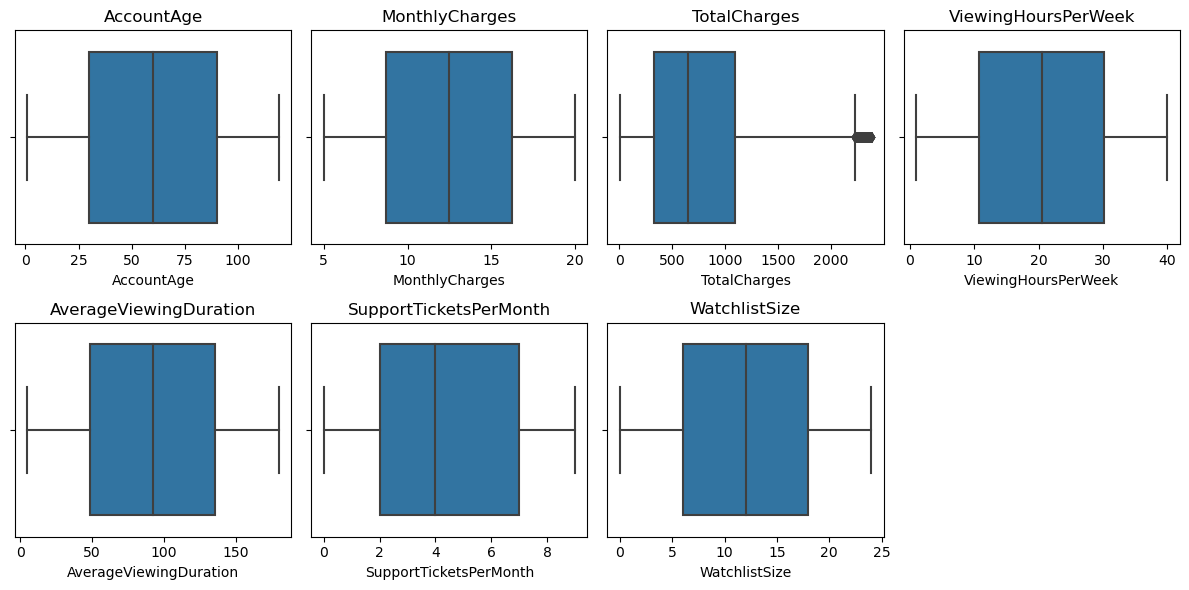

In [19]:
# Checking for outliers using box plots:
numerical_features = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'SupportTicketsPerMonth', 'WatchlistSize']

# Creating box plots to visualize the distribution of each numerical feature
plt.figure(figsize=(6, 4))
for feature in numerical_features:
    plt.subplot(2, 4, numerical_features.index(feature) + 1)
    sns.boxplot(x=train_df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

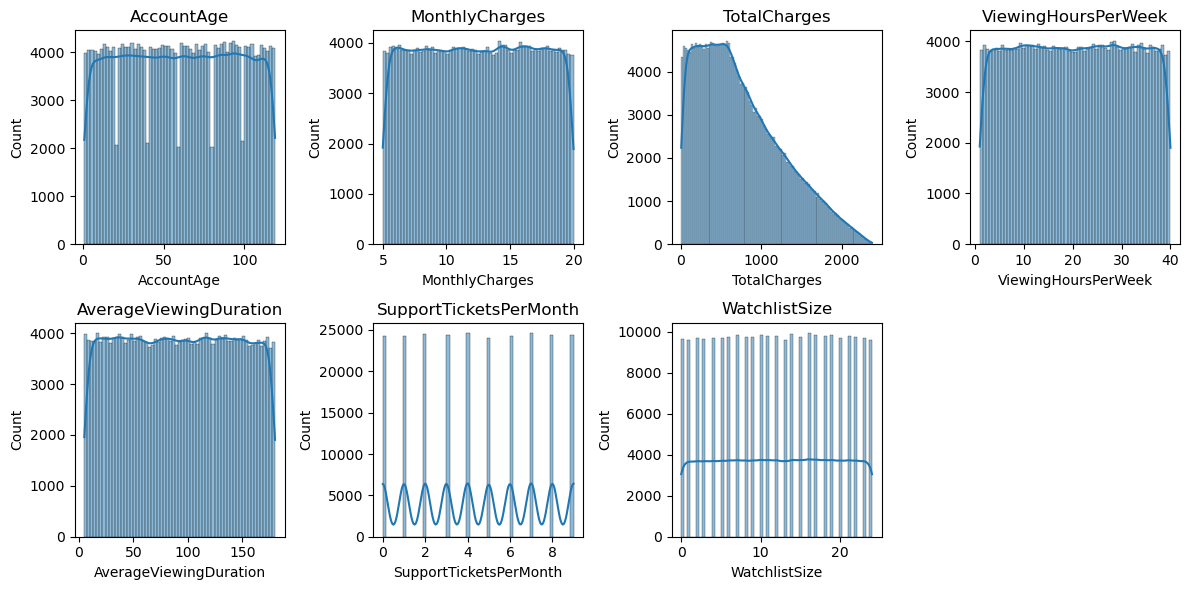

In [25]:
# Visualizing the Data 
numerical_features = ['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'SupportTicketsPerMonth', 'WatchlistSize']

# Creating distribution plot for each numerical feature
plt.figure(figsize=(12, 6))
for feature in numerical_features:
    plt.subplot(2, 4, numerical_features.index(feature) + 1)
    sns.histplot(train_df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

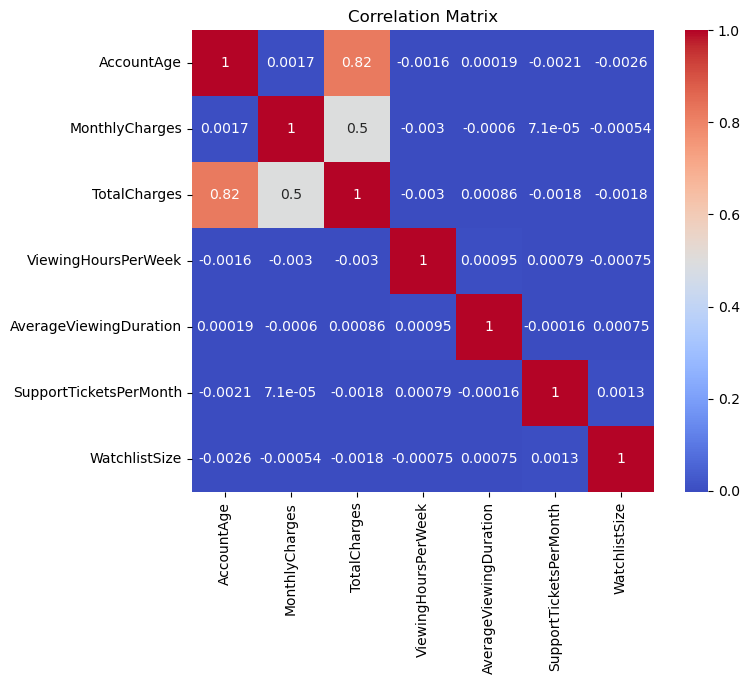

In [27]:
# Computing the correlation matrix using heatmap
correlation_matrix = train_df[numerical_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

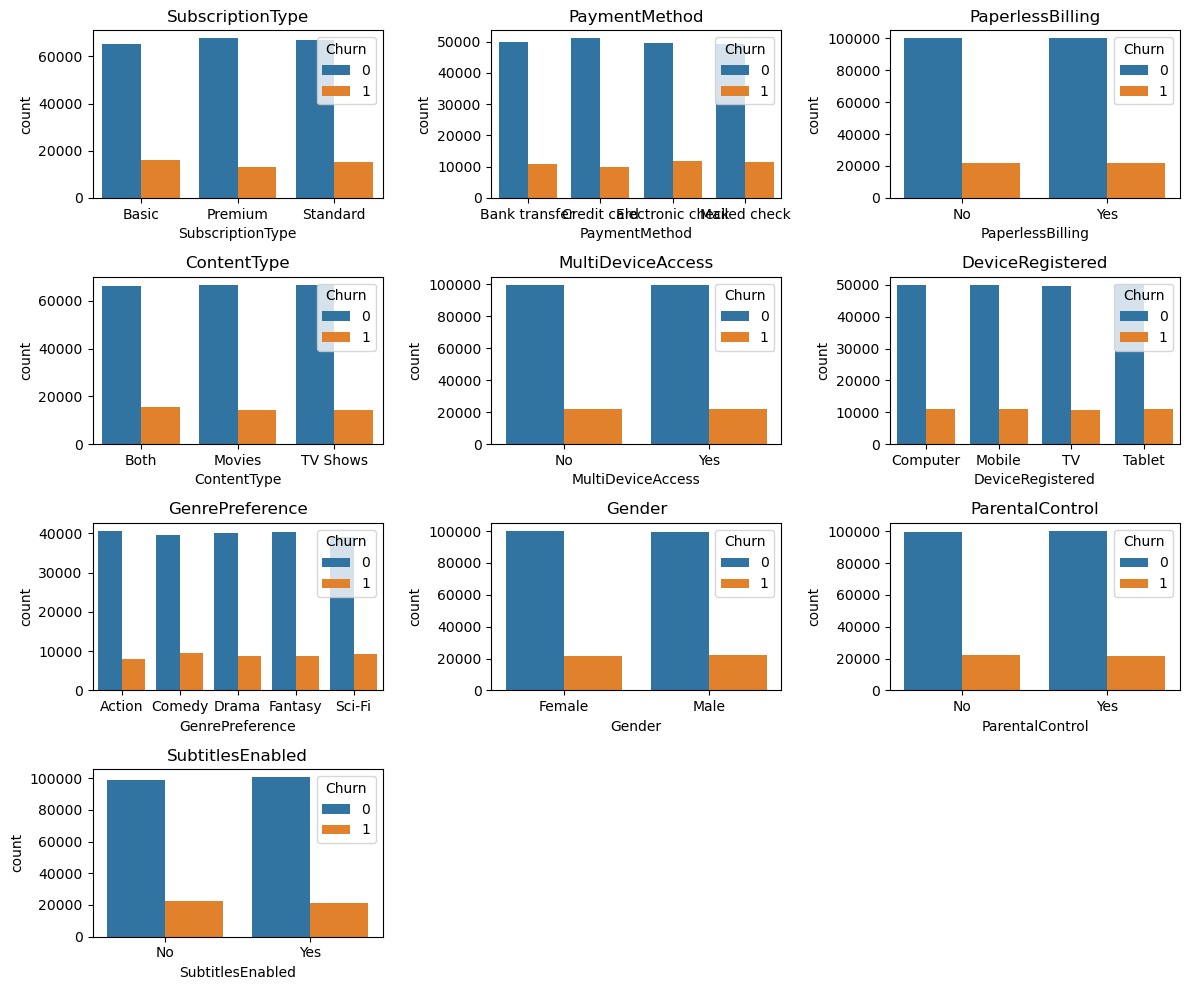

In [28]:
categorical_features = ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled']

# Creating bar plots for each categorical feature
plt.figure(figsize=(12, 10))
for feature in categorical_features:
    plt.subplot(4, 3, categorical_features.index(feature) + 1)
    sns.countplot(x=feature, data=train_df, hue='Churn')
    plt.title(feature)
    plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

# 5. Model Training and Evaluation 

* Model: Logistic Regression

* Data Splitting: 80% for training, 20% for validation

In [34]:
# Training and Evaluating the Model 
X_train = train_encoded.drop('Churn', axis=1) 
y_train = train_encoded['Churn']  # Target variable

In [35]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluating the model
train_accuracy = model.score(X_train, y_train)
val_accuracy = model.score(X_val, y_val)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.8232673089643079
Validation Accuracy: 0.8246031420484844


C:\Users\l\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# Generating predictions for the validation set
val_predictions = model.predict(X_val)
val_probabilities = model.predict_proba(X_val)[:, 1]

# Evaluating classification metrics
print("Validation Classification Report:")
print(classification_report(y_val, val_predictions))

# Calculating ROC AUC
roc_auc = roc_auc_score(y_val, val_probabilities)
print("Validation ROC AUC:", roc_auc)

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     39968
           1       0.57      0.11      0.19      8790

    accuracy                           0.82     48758
   macro avg       0.70      0.55      0.55     48758
weighted avg       0.79      0.82      0.77     48758

Validation ROC AUC: 0.7495246111565019


### Initial Model Evaluation Results:
* Accuracy: Training - 82.32%, Validation - 82.46%
* ROC AUC: Validation - 0.7495

In [36]:
##  Fine-Tuning the model

# Defining the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}

# Initializing the model
model = LogisticRegression()

# Performing grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Printing the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluating the best model
train_auc = best_model.score(X_train, y_train)
val_auc = best_model.score(X_val, y_val)

print("Training ROC AUC:", train_auc)
print("Validation ROC AUC:", val_auc)

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Training ROC AUC: 0.8236826318137302
Validation ROC AUC: 0.824951802781082


### Hyperparameter Tuning Results:

* Grid search with parameters: 'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'solver': ['liblinear'].
* Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [37]:
# Initialize the model
model = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

# Print the cross-validation scores
print("Cross-Validation ROC AUC Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print("Mean Cross-Validation ROC AUC:", cv_mean)
print("Standard Deviation of Cross-Validation ROC AUC:", cv_std)


C:\Users\l\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\l\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Cross-Validation ROC AUC Scores: [0.74290359 0.7519192  0.74678544 0.74188825 0.743903  ]
Mean Cross-Validation ROC AUC: 0.7454798943045289
Standard Deviation of Cross-Validation ROC AUC: 0.0036108985888496895


C:\Users\l\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Cross-Validation Results:
* Mean ROC AUC: 0.7455, Standard Deviation: 0.0036.

In [38]:
# Model Evaluation 

# Fit the model on the training data
model.fit(X_train, y_train)

# Generate predictions for the validation set
val_predictions = model.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions)

# Calculate precision
precision = precision_score(y_val, val_predictions)

# Calculate recall
recall = recall_score(y_val, val_predictions)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Replace 'best_model' with the actual best Logistic Regression model obtained from the grid search
logreg_best = grid_search.best_estimator_

# Make predictions on the test data using the best model
test_predictions = logreg_best.predict_proba(test_encoded)[:, 1]

C:\Users\l\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8246031420484844
Precision: 0.5674603174603174
Recall: 0.11387940841865757
F1 Score: 0.18969111237445518


### Final Predictions:
* Model: Logistic Regression with best hyperparameters.
#### Test Predictions:
* ROC AUC Scores: 0.7428, 0.7519, 0.7468, 0.7419, 0.7439 (cross-validation).
#### Evaluation Metrics:
* Accuracy: 82.46%
* Precision: 56.75%
* Recall: 11.38%
* F1 Score: 18.95%

In [39]:
# Creating the prediction dataframe
prediction_df = pd.DataFrame({
    'CustomerID': test_df['CustomerID'],  # CustomerID column from test_df
    'predicted_probability': test_predictions  # Predicted probabilities from the model
})

# View the shape of the prediction dataframe
print(prediction_df.shape)

# View the first 10 rows of the prediction dataframe
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0.093430
1,LFR4X92X8H,0.045760
2,QM5GBIYODA,0.381365
3,D9RXTK2K9F,0.038316
4,ENTCCHR1LR,0.148382
5,7A88BB5IO6,0.441121
6,70OMW9XEWR,0.129838
7,EL1RMFMPYL,0.305363
8,4IA2QPT6ZK,0.213129
9,AEDCWHSJDN,0.196768


# Conclusion:
* The logistic regression model, after careful tuning and evaluation, demonstrates an 82.46% accuracy in predicting subscription churn. 
* However, the recall rate (11.38%) indicates room for improvement, suggesting that the model might miss some churn cases. 
* Further optimization and potentially exploring more complex models could enhance prediction accuracy, especially in identifying customers at risk of churning.